In [1]:
#initialization
%matplotlib inline
import math
import numpy as np
import pandas as pd
from ML_Pipeline import (P1_read,
                         P2_explore,
                         P3_preprocess,
                         P4_features,
                         P5_classify,
                         P6_evaluate)
from sklearn.cross_validation import train_test_split

/home/student/.local/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/student/.local/lib/python3.4/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Necessary restart
data = P1_read.read('data/credit-data.csv')
li = 1
fi = [2,3,4,5,6,7,8,9,10,11,12]
label = data.columns[li]
features = list(data.columns[fi])
P3_preprocess.convert_vartype(data, label, 'bool')
P3_preprocess.convert_vartype(data, 'NumberOfDependents', 'int')

In [3]:
P3_preprocess.fill_miss(data, 'MonthlyIncome', method='mean')
P3_preprocess.fill_miss(data, 'NumberOfDependents', method='median')

In [4]:
P4_features.discretize(data, 'MonthlyIncome', 5, 'ufov')
P4_features.discretize(data, 'age', 5, 'uv')
P4_features.discretize(data, 'DebtRatio', 5, 'logspace')
P4_features.gen_dummies(data, ['age_cat',
                   'DebtRatio_cat',
                   'MonthlyIncome_cat'], drop = True)

Warning, DebtRatio has negative or zero values


In [5]:
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                           bool
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
age_cat_1                                  bool
age_cat_2                                  bool
age_cat_3                                  bool
age_cat_4                                  bool
age_cat_5                                  bool
DebtRatio_cat_1                            bool
DebtRatio_cat_2                            bool
DebtRatio_cat_3                         

### Initial Settings

In [6]:
#initialization
%matplotlib inline
import math
import numpy as np
import pandas as pd
from ML_Pipeline import (P1_read,
                         P2_explore,
                         P3_preprocess,
                         P4_features,
                         P5_classify,
                         P6_evaluate)
from sklearn.cross_validation import train_test_split

In [7]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
sns.set(style='whitegrid')
sns.set_color_codes('deep')

/usr/local/lib/python3.4/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [3]:
# Import custom modules

import sys
sys.path.append('./MachineLearning ToolBox')
        
from Pipeline1_read import read
from Pipeline2_explore import tabular, histogram
from Pipeline3_preprocess import check_miss, fill_miss, convert_vartype
from Pipeline4_features import discretize, gen_dummies
from Pipeline5_classify import display_importance, classify
from Pipeline6_evaluate import evaluate, plot_roc

/home/student/.local/lib/python3.4/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
from Pipeline7_predict import (best_clf, 
                               clf_loop, 
                               plot_precision_recall_n,
                               define_clfs_params,
                               Zero_Predictor,
                               Average_Predictor,
                               report,
                               calc_precision_recall,
                               plot_precision_recall_threshold,
                               precision_top_x)

NameError: name 'clf_switch' is not defined

In [5]:
#ML imports
from collections import Counter
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier,
                              BaggingClassifier)
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (roc_curve,
                             precision_recall_curve, 
                             average_precision_score,
                             accuracy_score,
                             precision_score,
                             recall_score,
                             auc, 
                             classification_report, 
                             confusion_matrix, 
                             f1_score)
from time import time
from inspect import signature
from pprint import pprint

# from imblearn import under_sampling, over_sampling
# from imblearn.under_sampling import RandomUnderSampler
# from imblearn.over_sampling import RandomOverSampler

In [6]:
#Notebook commands
from IPython.display import Image  
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

## Step 1. Read/Load Data

In [7]:
# Read Data into Pandas object
data = P1_read.read('data/credit-data.csv')

## Step 2. Explore Data

In [8]:
# Peek at columns to understand potential features and labels
data.dtypes

PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object

In [9]:
# Our dependent variable (label) is 'SeriousDlqin2yrs'
# Our independent variables (features) are all column names other 
# than 'PersonID' and the label

ls = 'SeriousDlqin2yrs'
label = data[ls]
cols = list(df.columns)
features = [x for x in cols if x != ls]

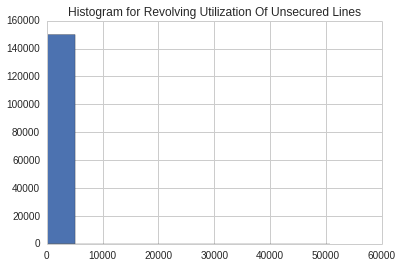

None


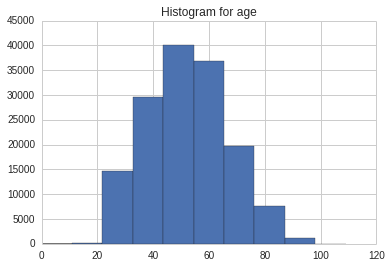

None


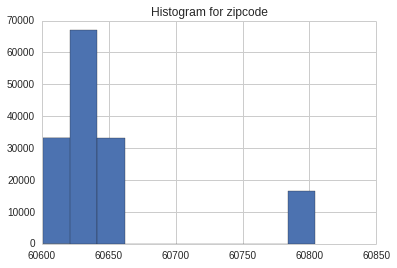

None


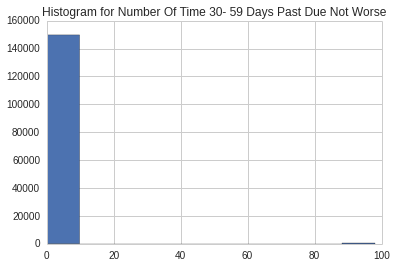

None


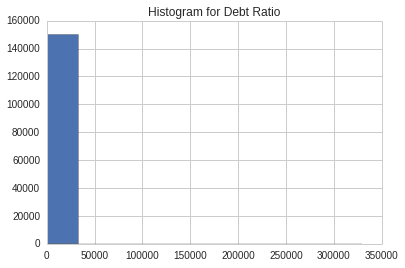

None


ValueError: max must be larger than min in range parameter.

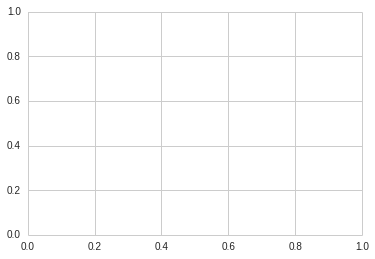

In [12]:
for varname in features:
    print(P2_explore.histogram(data,varname))

In [13]:
for varname in ['age',
                'NumberOfTime30-59DaysPastDueNotWorse',
                'NumberOfOpenCreditLinesAndLoans',
                'NumberOfTimes90DaysLate',
                'NumberRealEstateLoansOrLines',
                'NumberOfTime60-89DaysPastDueNotWorse',
                'NumberOfDependents']:
    P2_explore.varname(data,varname,label,'bar')["graph"]

NameError: name 'explore_varname' is not defined

## Step 3. Pre-process data

In [ ]:
# Fix variable types
P3_preprocess.convert_vartype(data, label, 'bool')
P3_preprocess.convert_vartype(data, 'NumberOfDependents', 'int')

In [ ]:
# Check for missing values
P3_preprocess.check_miss(data)

In [ ]:
# How many?
data.isnull().sum().sort_values(ascending = False)

In [ ]:
# Fill missing values
P3_preprocess.fill_miss(data, 'MonthlyIncome', method='mean')
P3_preprocess.fill_miss(data, 'NumberOfDependents', method='median')

In [ ]:
# Check for missing values
P3_preprocess.check_miss(data)

## Step 4. Create Features

### Selecting Features

In [ ]:
P4_features.display_importance(data, label, features, "Decision Tree")

In [ ]:
P4_features.display_importance(data, label, features, "Gradient Boosting")

In [ ]:
P4_features.display_importance(data, label, features, "Random Forest")

It seems like the 5 most important features among our classifiers is consistently:
* **'RevolvingUtilizationOfUnsecuredLines'**
* **'NumberOfTimes90DaysLate'**
* **'MonthlyIncome'** 
* **'age'**
* **'DebtRatio'** 

Only once, **'NumberOfTime30-59DaysPastDueNotWorse'** is also among the top five. It may be worth to consider it a main feature.

### Discretizing Features

In [ ]:
data['NumberOfTimes90DaysLate'].plot.bar()

In [ ]:
P4_features.discretize(data, 'MonthlyIncome', 5, 'ufov')
P4_features.discretize(data, 'age', 5, 'uv')
P4_features.discretize(data, 'DebtRatio', 5, 'logspace')

In [ ]:
P4_features.gen_dummies(data, ['age_cat',
                               'DebtRatio_cat',
                               'MonthlyIncome_cat'], drop = True)

In [ ]:
data.dtypes

In [5]:
features= ['RevolvingUtilizationOfUnsecuredLines', 'NumberOfTimes90DaysLate',
                'NumberOfTime30-59DaysPastDueNotWorse', 'MonthlyIncome_cat_1',
                'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
                'MonthlyIncome_cat_4', 'MonthlyIncome_cat_5',
                'age_cat_1', 'age_cat_2', 'age_cat_3', 'age_cat_4', 'age_cat_5',
                'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
                'DebtRatio_cat_4', 'DebtRatio_cat_5','DebtRatio_cat_6']

## Step 5. Classify

In [10]:
data[features].head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,MonthlyIncome_cat_1,MonthlyIncome_cat_2,MonthlyIncome_cat_3,MonthlyIncome_cat_4,MonthlyIncome_cat_5,age_cat_1,age_cat_2,age_cat_3,age_cat_4,age_cat_5,DebtRatio_cat_1,DebtRatio_cat_2,DebtRatio_cat_3,DebtRatio_cat_4,DebtRatio_cat_5,DebtRatio_cat_6
0,1,0,2,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False
1,1,0,0,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
2,1,1,1,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
3,0,0,0,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,1,0,1,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False


In [6]:
models = ['LR', 'KNN', 'DT', 'SVM', 'RF', 'GB']
metrics = ['precision', 'recall', 'f1', 'auc']

In [7]:
all_models = P5_classify.classify(data[features],
                                  data[label],
                                  models, 
                                  3, 
                                  0.05, 
                                  metrics)

LR is running...
Finished running LR
KNN is running...


KeyboardInterrupt: 

auc = classify.select_best_models(all_models, 
                                  models, 
                                  'auc')
                                  
precision = classify.select_best_models(all_models, 
                                        models, 
                                        'precision')
                                        
recall = classify.select_best_models(all_models, 
                                     models, 
                                     'recall')
                                     
f1 = classify.select_best_models(all_models, 
                                models, 
                                'f1')

In [ ]:
auc['table']

In [ ]:
precision['table']

In [ ]:
recall['table']

In [ ]:
f1['table']

In [ ]:
auc['best']

In [ ]:
precision['best']

In [ ]:
recall['best']

In [ ]:
f1['best']

In [ ]:
classify.gen_precision_recall_plots(df[fts], 
                                    df[label], 
                                    auc['best_model'])

In [ ]:
classify.gen_precision_recall_plots(df[fts], 
                                    df[label], 
                                    precision['best_model'])

In [ ]:
classify.gen_precision_recall_plots(df[fts], 
                                    df[label], 
                                    recall['best_model'])

In [ ]:
classify.gen_precision_recall_plots(df[fts], 
                                    df[label], 
                                    f1['best_model'])

## New Task: Find Best Training Model 

# Old Code

In [ ]:
try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split

from sklearn.grid_search import ParameterGrid
from sklearn.metrics import roc_auc_score

import pandas as pd

FEATURES = ['NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5']

MODELS_TO_RUN = ['RF', 'BA', 'AB', 'LR', 'SVM', 'DT', 'KNN']

GRID = test_grid

X = data.loc[:, FEATURES ]

Y = data['SeriousDlqin2yrs']

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)

results_df =  pd.DataFrame(columns=(
        'model_type','clf', 'parameters', 'auc-roc','p_at_5', 'p_at_10', 'p_at_20'))

for model_name in MODELS_TO_RUN:
    print(model_name)
    clf = make_model(model_name)
    parameter_values = GRID[model_name]

    for p in ParameterGrid(parameter_values):
        clf.set_params(**p)
        y_pred_probs = clf.fit(X_train, y_train).predict_proba(X_test)[:,1]
        y_pred_probs_sorted, y_test_sorted = zip(*sorted(zip(y_pred_probs, y_test), reverse=True))
        results_df.loc[len(results_df)] = [model_name, clf, p,
                                       roc_auc_score(y_test, y_pred_probs),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,5.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,10.0),
                                       precision_at_k(y_test_sorted,y_pred_probs_sorted,20.0)]


In [ ]:
# The task here is to predict who will  experience financial 
# distress in the next two years. The outcome variable (label) 
# in the data is SeriousDlqin2yrs. We have access to other information 
# about this person (as described in the data dictionary). Your assignment 
#is to take this data and build a machine learning pipeline that 
#trains *one* machine learning model on the data. 

from sklearn.model_selection import train_test_split


X = data.loc[:, ('NumberOfDependents', 'age', 'MonthlyIncome_cat_0',
       'MonthlyIncome_cat_1', 'MonthlyIncome_cat_2', 'MonthlyIncome_cat_3',
       'MonthlyIncome_cat_4', 'DebtRatio_cat_0',
       'DebtRatio_cat_1', 'DebtRatio_cat_2', 'DebtRatio_cat_3',
       'DebtRatio_cat_4', 'DebtRatio_cat_5')]

Y = data['SeriousDlqin2yrs']

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=None)
    
model = MyClassifier(X_train, Y_train, 'logistic')

model.model.score(X_test, Y_test)

In [ ]:
print(model.model.coef_)

### Step 6. Evaluate

In [ ]:
model.model.score(X_test, Y_test)

In [ ]:
import pandas as pd

probas = model.model.predict_proba(X_test)

pd.crosstab(Y_test, probas[:,1] > 0.2, rownames=["Actual"], colnames=["Predicted"])

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve

In [ ]:
accuracy_score(Y_test, probas[:,1] > 0.2)

In [ ]:
print(classification_report(Y_test, probas[:,1] > 0.2))

In [ ]:
precision_recall_curve(Y_test, probas[:,1])

In [ ]:
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix

confusion_matrix(Y_test, model.model.predict(X_test))


In [ ]:
probas = model.model.predict_proba(X_train)

In [ ]:
sum(probas[:,1] > 0.2)

In [ ]:
model.model.predict(X_test)

In [ ]:
d = pd.DataFrame({'a': [5,6,7], 'b':[0,1,3]}, index=[10,13,14])
d = binarize_categories(d, ['a'], True)
d.head()